In [1]:
# Add all the imports for data visualization and machine-learning
import sklearn  
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Load the csv file into a pandas dataframe
df = pd.read_csv('WineQT.csv')

In [3]:
# Check the data types for each of the rows
print('------------Data types of each column---------------')
print(df.info())

------------Data types of each column---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None


In [4]:
# Print out the first 5 rows just to Check view
print('------------First Five Rows---------------')
print(df.iloc[0:5,:])

------------First Five Rows---------------
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4       

In [5]:
#Data Visualization
#Drop ID Column because it is irrelevant
df=df.drop(columns=['Id'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB
None


In [6]:
# Describe the Dataset and check what (if any) values are null
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
# Check how many values in each column are null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64


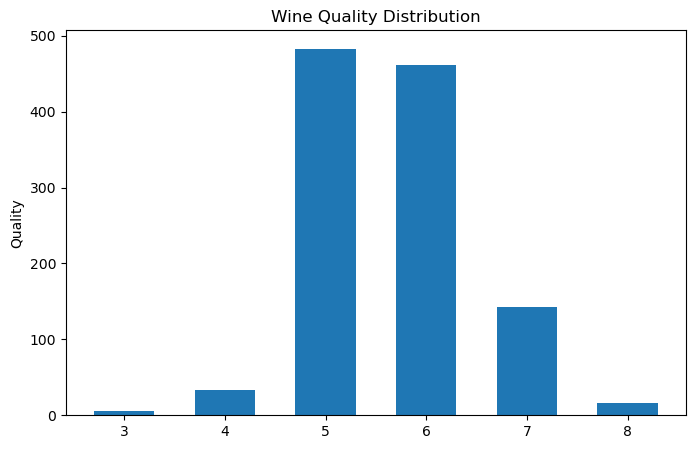

In [8]:
#Distribution of Wine Qualities
counts = df['quality'].value_counts()
print(counts)
x=[5,6,7,4,8,3]

plt.figure(figsize=(8,5))
plt.bar(x,height=counts,width=.6)
plt.ylabel("Quality")
plt.title("Wine Quality Distribution")
plt.show()

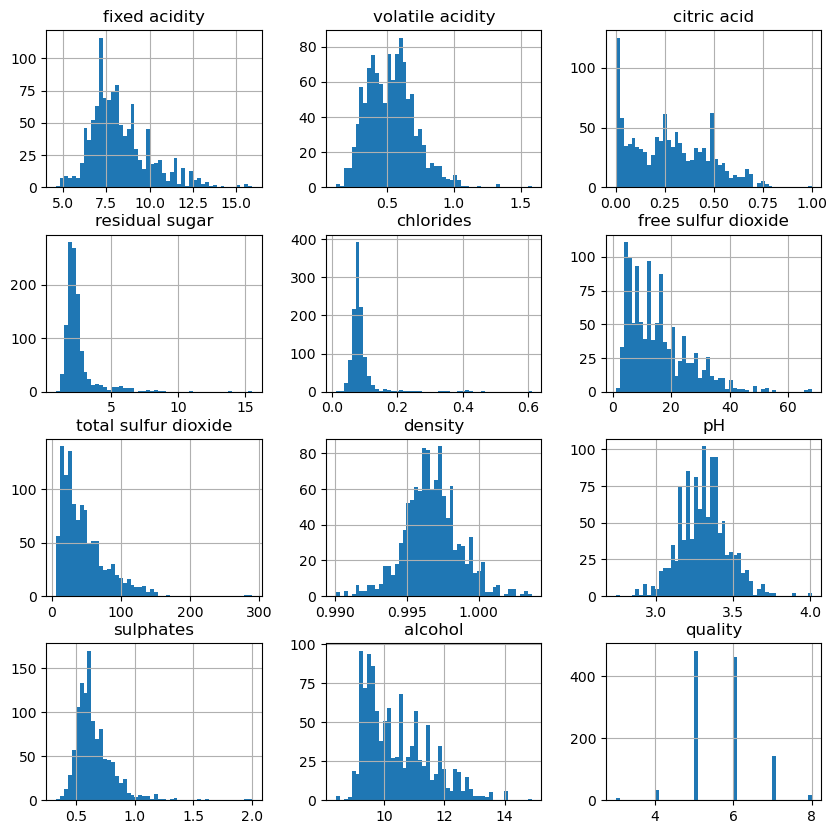

In [33]:
df.hist(bins=50,figsize=(10,10))
plt.show()

<AxesSubplot:>

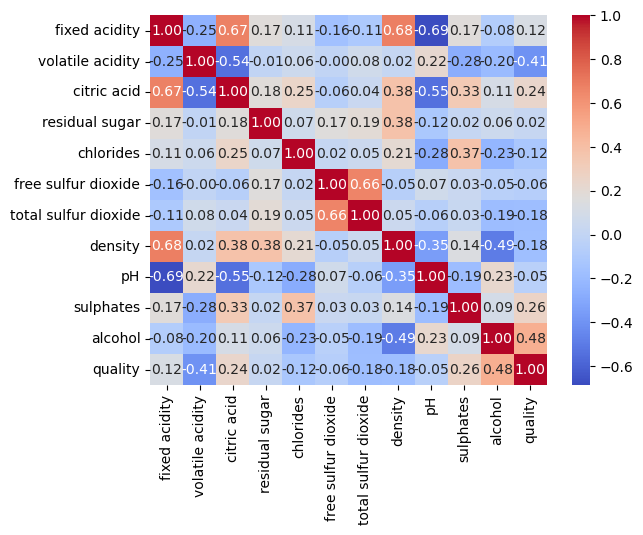

In [10]:
# Correlation heatmap
import seaborn as sb
corr = df.corr()
sb.heatmap(corr, cmap = "coolwarm", annot=True, fmt=".2f")
# Correlation between quality and residual sugar, free sulfer dioxide, or pH are all low (absolute value < 0.1)
# With that in mind we consider dropping these columns from the table
#df = df.drop(columns=["residual sugar"])
#df = df.drop(columns=["free sulfur dioxide"])
#df = df.drop(columns=["pH"])

In [11]:
# Split data into test, train and validation set
from sklearn.model_selection import train_test_split

#Get input features and output variables
X=df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]]
y=df.iloc[:,[11]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) 

In [12]:
# Neural Network imports
import tensorflow as tf
from tensorflow import keras

2023-04-26 13:51:49.051530: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
#Test Neural Networks

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


model = keras.models.Sequential()


# The Input Layer :
model.add(keras.layers.Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))


# The Hidden Layers :
model.add(keras.layers.Dense(250,kernel_initializer='normal', activation="relu"))
model.add(keras.layers.Dense(250,kernel_initializer='normal', activation="relu"))
model.add(keras.layers.Dense(250, kernel_initializer='normal',activation="relu"))

# The Output Layer :
model.add(keras.layers.Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])


In [14]:
# Summary of initail neural network model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 250)               32250     
                                                                 
 dense_2 (Dense)             (None, 250)               62750     
                                                                 
 dense_3 (Dense)             (None, 250)               62750     
                                                                 
 dense_4 (Dense)             (None, 1)                 251       
                                                                 
Total params: 159,537
Trainable params: 159,537
Non-trainable params: 0
_________________________________________________________________


In [16]:
#Train the first model on the dataset and validation data
history=model.fit(X_train, y_train, epochs=200,validation_data=(X_val, y_val))

Epoch 1/200
22/22 [==============================] - 0s 6ms/step - loss: 0.3797 - mean_squared_error: 0.3797 - val_loss: 0.4670 - val_mean_squared_error: 0.4670
Epoch 2/200
22/22 [==============================] - 0s 4ms/step - loss: 0.4165 - mean_squared_error: 0.4165 - val_loss: 0.5059 - val_mean_squared_error: 0.5059
Epoch 3/200
22/22 [==============================] - 0s 4ms/step - loss: 0.4189 - mean_squared_error: 0.4189 - val_loss: 0.5552 - val_mean_squared_error: 0.5552
Epoch 4/200
22/22 [==============================] - 0s 4ms/step - loss: 0.4149 - mean_squared_error: 0.4149 - val_loss: 0.5687 - val_mean_squared_error: 0.5687
Epoch 5/200
22/22 [==============================] - 0s 4ms/step - loss: 0.4218 - mean_squared_error: 0.4218 - val_loss: 0.5248 - val_mean_squared_error: 0.5248
Epoch 6/200
22/22 [==============================] - 0s 4ms/step - loss: 0.4520 - mean_squared_error: 0.4520 - val_loss: 0.5126 - val_mean_squared_error: 0.5126
Epoch 7/200
22/22 [===============

22/22 [==============================] - 0s 3ms/step - loss: 0.3751 - mean_squared_error: 0.3751 - val_loss: 0.5054 - val_mean_squared_error: 0.5054
Epoch 52/200
22/22 [==============================] - 0s 3ms/step - loss: 0.3767 - mean_squared_error: 0.3767 - val_loss: 0.4877 - val_mean_squared_error: 0.4877
Epoch 53/200
22/22 [==============================] - 0s 3ms/step - loss: 0.4142 - mean_squared_error: 0.4142 - val_loss: 0.5087 - val_mean_squared_error: 0.5087
Epoch 54/200
22/22 [==============================] - 0s 3ms/step - loss: 0.3756 - mean_squared_error: 0.3756 - val_loss: 0.4701 - val_mean_squared_error: 0.4701
Epoch 55/200
22/22 [==============================] - 0s 3ms/step - loss: 0.3750 - mean_squared_error: 0.3750 - val_loss: 0.5123 - val_mean_squared_error: 0.5123
Epoch 56/200
22/22 [==============================] - 0s 3ms/step - loss: 0.3737 - mean_squared_error: 0.3737 - val_loss: 0.5382 - val_mean_squared_error: 0.5382
Epoch 57/200
22/22 [=====================

22/22 [==============================] - 0s 3ms/step - loss: 0.3753 - mean_squared_error: 0.3753 - val_loss: 0.4761 - val_mean_squared_error: 0.4761
Epoch 102/200
22/22 [==============================] - 0s 3ms/step - loss: 0.3962 - mean_squared_error: 0.3962 - val_loss: 0.6423 - val_mean_squared_error: 0.6423
Epoch 103/200
22/22 [==============================] - 0s 3ms/step - loss: 0.3745 - mean_squared_error: 0.3745 - val_loss: 0.5228 - val_mean_squared_error: 0.5228
Epoch 104/200
22/22 [==============================] - 0s 3ms/step - loss: 0.3917 - mean_squared_error: 0.3917 - val_loss: 0.5068 - val_mean_squared_error: 0.5068
Epoch 105/200
22/22 [==============================] - 0s 3ms/step - loss: 0.3707 - mean_squared_error: 0.3707 - val_loss: 0.6077 - val_mean_squared_error: 0.6077
Epoch 106/200
22/22 [==============================] - 0s 3ms/step - loss: 0.3707 - mean_squared_error: 0.3707 - val_loss: 0.4645 - val_mean_squared_error: 0.4645
Epoch 107/200
22/22 [===============

22/22 [==============================] - 0s 3ms/step - loss: 0.4084 - mean_squared_error: 0.4084 - val_loss: 0.5116 - val_mean_squared_error: 0.5116
Epoch 152/200
22/22 [==============================] - 0s 3ms/step - loss: 0.3605 - mean_squared_error: 0.3605 - val_loss: 0.5530 - val_mean_squared_error: 0.5530
Epoch 153/200
22/22 [==============================] - 0s 3ms/step - loss: 0.3791 - mean_squared_error: 0.3791 - val_loss: 0.4930 - val_mean_squared_error: 0.4930
Epoch 154/200
22/22 [==============================] - 0s 3ms/step - loss: 0.3491 - mean_squared_error: 0.3491 - val_loss: 0.4727 - val_mean_squared_error: 0.4727
Epoch 155/200
22/22 [==============================] - 0s 3ms/step - loss: 0.3471 - mean_squared_error: 0.3471 - val_loss: 0.4863 - val_mean_squared_error: 0.4863
Epoch 156/200
22/22 [==============================] - 0s 3ms/step - loss: 0.3468 - mean_squared_error: 0.3468 - val_loss: 0.5138 - val_mean_squared_error: 0.5138
Epoch 157/200
22/22 [===============

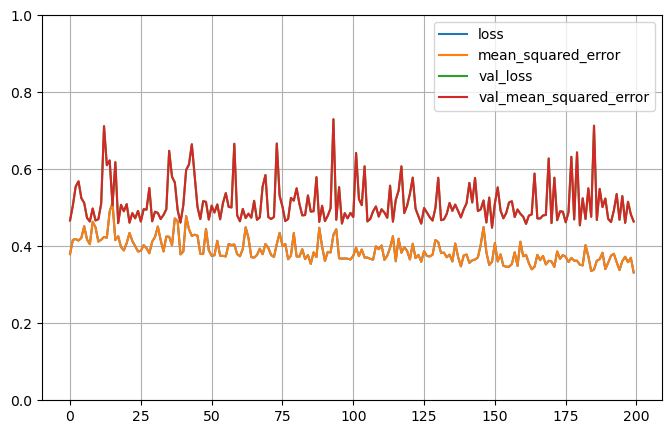

In [17]:
#Graph mean-squared error and val_mean_squared_error for each iteration
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [18]:
#Build model with given parameters, user for tuning the NN
def build_model(n_hidden=2, n_neurons=300, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons,kernel_initializer='normal', activation="relu"))
    model.add(keras.layers.Dense(1, kernel_initializer='normal',activation='linear'))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    
    return model

In [19]:
#Really a Keras Regressor that is used to tun model
keras_clf = keras.wrappers.scikit_learn.KerasRegressor(build_model)

/var/folders/2s/3j85r405643347h001xfsm880000gn/T/ipykernel_69088/2399498239.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_clf = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [27]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

#Tuning the model using randomSearch CV
param_distribs = {
    "n_hidden": [2, 3, 4, 5],
    "n_neurons": np.arange(200, 250).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_clf, param_distribs, scoring='neg_mean_absolute_error',n_iter=5, cv=5)
rnd_search_cv.fit(X_train, y_train, epochs=10,
                  validation_data=(X_val, y_val),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/10
18/18 [==============================] - 1s 11ms/step - loss: 11.7966 - mean_squared_error: 11.7966 - val_loss: 5.7754 - val_mean_squared_error: 5.7754
Epoch 2/10
18/18 [==============================] - 0s 5ms/step - loss: 2.2422 - mean_squared_error: 2.2422 - val_loss: 1.5599 - val_mean_squared_error: 1.5599
Epoch 3/10
18/18 [==============================] - 0s 6ms/step - loss: 0.9392 - mean_squared_error: 0.9392 - val_loss: 0.7995 - val_mean_squared_error: 0.7995
Epoch 4/10
18/18 [==============================] - 0s 6ms/step - loss: 0.7733 - mean_squared_error: 0.7733 - val_loss: 0.7722 - val_mean_squared_error: 0.7722
Epoch 5/10
18/18 [==============================] - 0s 5ms/step - loss: 0.6244 - mean_squared_error: 0.6244 - val_loss: 0.6739 - val_mean_squared_error: 0.6739
Epoch 6/10
18/18 [==============================] - 0s 4ms/step - loss: 0.5587 - mean_squared_error: 0.5587 - val_loss: 0.6295 - val_mean_squared_error: 0.6295
Epoch 7/10
18/18 [===================

5/5 [==============================] - 0s 1ms/step
Epoch 1/10
18/18 [==============================] - 1s 11ms/step - loss: 12.9144 - mean_squared_error: 12.9144 - val_loss: 4.7261 - val_mean_squared_error: 4.7261
Epoch 2/10
18/18 [==============================] - 0s 4ms/step - loss: 2.1764 - mean_squared_error: 2.1764 - val_loss: 1.5918 - val_mean_squared_error: 1.5918
Epoch 3/10
18/18 [==============================] - 0s 4ms/step - loss: 0.9884 - mean_squared_error: 0.9884 - val_loss: 0.9701 - val_mean_squared_error: 0.9701
Epoch 4/10
18/18 [==============================] - 0s 3ms/step - loss: 0.7991 - mean_squared_error: 0.7991 - val_loss: 0.8443 - val_mean_squared_error: 0.8443
Epoch 5/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6718 - mean_squared_error: 0.6718 - val_loss: 0.7316 - val_mean_squared_error: 0.7316
Epoch 6/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6078 - mean_squared_error: 0.6078 - val_loss: 0.6741 - val_mean_squared_

5/5 [==============================] - 0s 1ms/step
Epoch 1/10
18/18 [==============================] - 1s 9ms/step - loss: 10.4210 - mean_squared_error: 10.4210 - val_loss: 4.8299 - val_mean_squared_error: 4.8299
Epoch 2/10
18/18 [==============================] - 0s 4ms/step - loss: 1.9681 - mean_squared_error: 1.9681 - val_loss: 1.5076 - val_mean_squared_error: 1.5076
Epoch 3/10
18/18 [==============================] - 0s 4ms/step - loss: 0.8740 - mean_squared_error: 0.8740 - val_loss: 0.8564 - val_mean_squared_error: 0.8564
Epoch 4/10
18/18 [==============================] - 0s 4ms/step - loss: 0.6914 - mean_squared_error: 0.6914 - val_loss: 0.6469 - val_mean_squared_error: 0.6469
Epoch 5/10
18/18 [==============================] - 0s 4ms/step - loss: 0.5541 - mean_squared_error: 0.5541 - val_loss: 0.6589 - val_mean_squared_error: 0.6589
Epoch 6/10
18/18 [==============================] - 0s 4ms/step - loss: 0.5275 - mean_squared_error: 0.5275 - val_loss: 0.6049 - val_mean_squared_e

18/18 [==============================] - 0s 3ms/step - loss: 0.5176 - mean_squared_error: 0.5176 - val_loss: 0.5856 - val_mean_squared_error: 0.5856
Epoch 10/10
5/5 [==============================] - 0s 1ms/step
Epoch 1/10
18/18 [==============================] - 1s 9ms/step - loss: 10.5784 - mean_squared_error: 10.5784 - val_loss: 3.2269 - val_mean_squared_error: 3.2269
Epoch 2/10
18/18 [==============================] - 0s 3ms/step - loss: 1.1798 - mean_squared_error: 1.1798 - val_loss: 0.8593 - val_mean_squared_error: 0.8593
Epoch 3/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6790 - mean_squared_error: 0.6790 - val_loss: 0.6957 - val_mean_squared_error: 0.6957
Epoch 4/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6310 - mean_squared_error: 0.6310 - val_loss: 0.6288 - val_mean_squared_error: 0.6288
Epoch 5/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5491 - mean_squared_error: 0.5491 - val_loss: 0.6260 - val_mean_squared_

18/18 [==============================] - 0s 3ms/step - loss: 0.5398 - mean_squared_error: 0.5398 - val_loss: 0.7060 - val_mean_squared_error: 0.7060
Epoch 9/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5158 - mean_squared_error: 0.5158 - val_loss: 0.5883 - val_mean_squared_error: 0.5883
Epoch 10/10
5/5 [==============================] - 0s 1ms/step
Epoch 1/10
18/18 [==============================] - 1s 11ms/step - loss: 13.2033 - mean_squared_error: 13.2033 - val_loss: 4.7422 - val_mean_squared_error: 4.7422
Epoch 2/10
18/18 [==============================] - 0s 9ms/step - loss: 2.0756 - mean_squared_error: 2.0756 - val_loss: 1.9243 - val_mean_squared_error: 1.9243
Epoch 3/10
18/18 [==============================] - 0s 4ms/step - loss: 0.9570 - mean_squared_error: 0.9570 - val_loss: 0.8652 - val_mean_squared_error: 0.8652
Epoch 4/10
18/18 [==============================] - 0s 4ms/step - loss: 0.7476 - mean_squared_error: 0.7476 - val_loss: 0.7418 - val_mean_squared

18/18 [==============================] - 0s 4ms/step - loss: 0.6443 - mean_squared_error: 0.6443 - val_loss: 0.6602 - val_mean_squared_error: 0.6602
Epoch 8/10
18/18 [==============================] - 0s 4ms/step - loss: 0.5959 - mean_squared_error: 0.5959 - val_loss: 0.6455 - val_mean_squared_error: 0.6455
Epoch 9/10
18/18 [==============================] - 0s 4ms/step - loss: 0.5241 - mean_squared_error: 0.5241 - val_loss: 0.5913 - val_mean_squared_error: 0.5913
Epoch 10/10
5/5 [==============================] - 0s 1ms/step
Epoch 1/10
22/22 [==============================] - 1s 8ms/step - loss: 10.6811 - mean_squared_error: 10.6811 - val_loss: 3.4961 - val_mean_squared_error: 3.4961
Epoch 2/10
22/22 [==============================] - 0s 3ms/step - loss: 1.1472 - mean_squared_error: 1.1472 - val_loss: 0.7090 - val_mean_squared_error: 0.7090
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.5722 - mean_squared_error: 0.5722 - val_loss: 0.6776 - val_mean_squared_

RandomizedSearchCV(cv=5,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fbfa5506ca0>,
                   n_iter=5,
                   param_distributions={'learning_rate': [0.002227993407844327,
                                                          0.024174721718538662,
                                                          0.008234015038864674,
                                                          0.02174961934365179,
                                                          0.0034064122137230715,
                                                          0.0009883933261915219,
                                                          0.00038262613198319174,
                                                          0.008497495782156025,
                                                          0.0005244779697349237,
                                                          0.0012096...
                                                   

In [31]:
# Print best score and best estimator.
score = rnd_search_cv.best_score_
best_model=rnd_search_cv.best_estimator_.model
print(score)
#print(rnd_search_cv.score(X_test, y_test))
print(best_model.evaluate(X_test,y_test))
print("Best Parameters")
print("-------------------------------")
print(rnd_search_cv.best_params_)

-0.6295840270327825
8/8 [==============================] - 0s 2ms/step - loss: 0.4512 - mean_squared_error: 0.4512
[0.45117729902267456, 0.45117729902267456]
Best Parameter
-------------------------------
{'n_neurons': 240, 'n_hidden': 2, 'learning_rate': 0.024347477237196942}
